# INCOME PREDICTION FROM CENSUS DATA

Income is predicted using <b>Adult Dataset</b> which was extracted in <b>1994</b> from <b>Census Data</b> of the United States. It contains continuous and nominal attributes, describing some social information about the citizens registered. 


<b>The task is to predict whether the citizen’s income exceeds Fifty Thousand Dollars a year</b>.

It is a multivariate dataset with 14 features, out of which <b>6 are real</b> and <b>8 are nominal</b>. Features are:
<ul>
<li>Age
<li>Workclass
<li>Final Sampling Weight
<li>Education
<li>Education in Numbers
<li>Marital Status
<li>Occupation
<li>Relationship
<li>Race
<li>Gender
<li>Capital Gain
<li>Capital Loss
<li>Hours per week
<li>Country
<li/>Label
</ul>

This dataset has been obtained from the UCI Machine Learning Repository. The original page where the data set can be found is: http://archive.ics.uci.edu/ml/datasets/Adult.

# DATA ANALYSIS / CLEANING / WRANGLING

Lets Start do some Data Wrangling before we start predicting using a supervised ML model.  
<ul><li>Loading Libraries
<li>Importing Data into a pandas Dataframe
<li>Skiping Header
<li>Naming Coloumns</ul>

In [1]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [2]:
df = pd.read_csv('adult.dat',skiprows=17)
df.columns = ['Age','Workclass','Final Sampling Weight','Education','Education Numbers','Marital Status','Occupation','Relationship','Race','Gender','Capital Gain','Capital Loss','Hours per week','Country','Label']
df.head()

,Age,Workclass,Final Sampling Weight,Education,Education Numbers,Marital Status,Occupation,Relationship,Race,Gender,Capital Gain,Capital Loss,Hours per week,Country,Label
0,38.0,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
1,28.0,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
2,44.0,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K
3,34.0,Private,198693.0,10th,6.0,Never-married,Other-service,Not-in-family,White,Male,0.0,0.0,30.0,United-States,<=50K
4,63.0,Self-emp-not-inc,104626.0,Prof-school,15.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103.0,0.0,32.0,United-States,>50K


In [3]:
print('Dataframe has '+ str(df.shape[0]) + ' rows and ' + str(df.shape[1]) + ' coloumns')

Dataframe has 45221 rows and 15 coloumns


### Eliminating Countries other than United States

In [4]:
# Counting instances where country is US.
df1 = df[['Country']]=='United-States'
df1.describe()
# There are 41291 instances out of 45221 where country is US.

# since we are predicting for US only we will remove other rows
df = df[df.Country == 'United-States']

# Since all the values in Countries coloumn are same, there is no need for it. we will drop it altogether.
df.drop('Country',axis =1,inplace=True)
df.shape

(41291, 14)

### Converting all nominal attributes to numeric type

In [5]:
df['Gender'] = df['Gender'].replace({'Male':0,'Female':1})
df['Workclass'] = df['Workclass'].replace({'Private':1,'Local-gov':2, 'Self-emp-not-inc':3, 'Federal-gov':4, 'State-gov':5,'Self-emp-inc':6, 'Without-pay':7})
df['Occupation'] = df['Occupation'].replace({'Farming-fishing':1, 'Protective-serv':2, 'Machine-op-inspct':3,'Other-service':4, 'Prof-specialty':5, 'Craft-repair':6, 'Adm-clerical':7,'Exec-managerial':8, 'Tech-support':9, 'Sales':10, 'Transport-moving':11,'Priv-house-serv':12, 'Handlers-cleaners':13, 'Armed-Forces':14})
df['Marital Status'] = df['Marital Status'].replace({'Married-civ-spouse':1, 'Never-married':2, 'Widowed':3, 'Separated':4,'Divorced':5, 'Married-spouse-absent':6, 'Married-AF-spouse':7})
df['Relationship'] = df['Relationship'].replace({'Husband':1, 'Not-in-family':2, 'Unmarried':3, 'Own-child':4, 'Wife':5,'Other-relative':6})
df['Race'] = df['Race'].replace({'White':1, 'Black':2, 'Amer-Indian-Eskimo':3, 'Asian-Pac-Islander':4,'Other':5})
df['Label'] = df['Label'].replace({'<=50K':0, '>50K':1})

# Since we already have a education in numbers coloumn we dont need education colounm of object type
df.drop('Education',axis=1,inplace=True)
df = df.astype(int,inplace=True)
df.dtypes

Age                      int64
Workclass                int64
Final Sampling Weight    int64
Education Numbers        int64
Marital Status           int64
Occupation               int64
Relationship             int64
Race                     int64
Gender                   int64
Capital Gain             int64
Capital Loss             int64
Hours per week           int64
Label                    int64
dtype: object

In [6]:
print(df.shape)
# class distribution
print(df.groupby('Label').size())
df.head()

(41291, 13)
Label
0    30843
1    10448
dtype: int64


,Age,Workclass,Final Sampling Weight,Education Numbers,Marital Status,Occupation,Relationship,Race,Gender,Capital Gain,Capital Loss,Hours per week,Label
0,38,1,89814,9,1,1,1,1,0,0,0,50,0
1,28,2,336951,12,1,2,1,1,0,0,0,40,1
2,44,1,160323,10,1,3,1,2,0,7688,0,40,1
3,34,1,198693,6,2,4,2,1,0,0,0,30,0
4,63,3,104626,15,1,5,1,1,0,3103,0,32,1


# Predictions using various Classification Models

### Patition the dataset into train (66%) and test (33%)

In [7]:
# Extracting Features from dataset 
X = df[['Age','Workclass','Final Sampling Weight','Education Numbers','Marital Status','Occupation','Relationship','Race','Gender','Capital Gain','Capital Loss','Hours per week']]
X = X.as_matrix()
print(X[0])

# Extracting labels column from dataset
Y = df[['Label']]
Y =Y.as_matrix().flatten()
print(Y)

validation_size = 0.33
seed = 10
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

print('\nLenth of Trainging set:\n',len(X_train),"\n")
print('Lenth of Test set:\n',len(X_validation))

[   38     1 89814     9     1     1     1     1     0     0     0    50]
[0 1 1 ..., 0 0 1]

Lenth of Trainging set:
 27664 

Lenth of Test set:
 13627


### Decision Tree Classifier

In [8]:
DT = DecisionTreeClassifier()
DT.fit(X_train, Y_train)
predictions = DT.predict(X_validation)

print('Accuracy:\n',accuracy_score(Y_validation, predictions),"\n")
print('Confusion Matrix:\n',confusion_matrix(Y_validation, predictions),"\n")
print('Classification Report:\n',classification_report(Y_validation, predictions),)

Accuracy:
 0.806266969986 

Confusion Matrix:
 [[8826 1390]
 [1250 2161]] 

Classification Report:
              precision    recall  f1-score   support

          0       0.88      0.86      0.87     10216
          1       0.61      0.63      0.62      3411

avg / total       0.81      0.81      0.81     13627



### Performing 10-fold cross validation and computing accuracy

In [9]:
# Cross Validation
seed = 10
scoring = 'accuracy'
kfold = model_selection.KFold(n_splits=10, random_state=seed)
cv_results = model_selection.cross_val_score(DT, X_train, Y_train, cv=kfold, scoring=scoring)
print(cv_results)
print(sum(cv_results)/10)

[ 0.79689194  0.81026382  0.79291652  0.80014456  0.80983369  0.79681851
  0.79826464  0.80404917  0.81525669  0.79718004]
0.802161958899


### Logistic Regression 

In [10]:
LR = LogisticRegression()
LR.fit(X_train, Y_train)
predictions = LR.predict(X_validation)

print('Accuracy:\n',accuracy_score(Y_validation, predictions),"\n")
print('Confusion Matrix:\n',confusion_matrix(Y_validation, predictions),"\n")
print('Classification Report:\n',classification_report(Y_validation, predictions),"\n")

Accuracy:
 0.792324062523 

Confusion Matrix:
 [[9861  355]
 [2475  936]] 

Classification Report:
              precision    recall  f1-score   support

          0       0.80      0.97      0.87     10216
          1       0.73      0.27      0.40      3411

avg / total       0.78      0.79      0.76     13627
 



### Linear Discriminant Analysis

In [11]:
LDA = LinearDiscriminantAnalysis()
LDA.fit(X_train, Y_train)
predictions = LDA.predict(X_validation)

print('Accuracy:\n',accuracy_score(Y_validation, predictions),"\n")
print('Confusion Matrix:\n',confusion_matrix(Y_validation, predictions),"\n")
print('Classification Report:\n',classification_report(Y_validation, predictions),"\n")

Accuracy:
 0.818081749468 

Confusion Matrix:
 [[9585  631]
 [1848 1563]] 

Classification Report:
              precision    recall  f1-score   support

          0       0.84      0.94      0.89     10216
          1       0.71      0.46      0.56      3411

avg / total       0.81      0.82      0.80     13627
 



In [17]:
from sklearn.ensemble import RandomForestClassifier as RFC
RFC = RFC()
RFC.fit(X_train, Y_train)
predictions = RFC.predict(X_validation)

print('Accuracy:\n',accuracy_score(Y_validation, predictions),"\n")
print('Confusion Matrix:\n',confusion_matrix(Y_validation, predictions),"\n")
print('Classification Report:\n',classification_report(Y_validation, predictions),"\n")

Accuracy:
 0.846994936523 

Confusion Matrix:
 [[9518  698]
 [1387 2024]] 

Classification Report:
              precision    recall  f1-score   support

          0       0.87      0.93      0.90     10216
          1       0.74      0.59      0.66      3411

avg / total       0.84      0.85      0.84     13627
 



In [13]:
GNB = GaussianNB()
GNB.fit(X_train, Y_train)
predictions = GNB.predict(X_validation)

print('Accuracy:\n',accuracy_score(Y_validation, predictions),"\n")
print('Confusion Matrix:\n',confusion_matrix(Y_validation, predictions),"\n")
print('Classification Report:\n',classification_report(Y_validation, predictions),"\n")

Accuracy:
 0.790195934542 

Confusion Matrix:
 [[9707  509]
 [2350 1061]] 

Classification Report:
              precision    recall  f1-score   support

          0       0.81      0.95      0.87     10216
          1       0.68      0.31      0.43      3411

avg / total       0.77      0.79      0.76     13627
 



In [14]:
KN = KNeighborsClassifier()
KN.fit(X_train, Y_train)
predictions = KN.predict(X_validation)

print('Accuracy:\n',accuracy_score(Y_validation, predictions),"\n")
print('Confusion Matrix:\n',confusion_matrix(Y_validation, predictions),"\n")
print('Classification Report:\n',classification_report(Y_validation, predictions),"\n")

Accuracy:
 0.767593747707 

Confusion Matrix:
 [[9298  918]
 [2249 1162]] 

Classification Report:
              precision    recall  f1-score   support

          0       0.81      0.91      0.85     10216
          1       0.56      0.34      0.42      3411

avg / total       0.74      0.77      0.75     13627
 



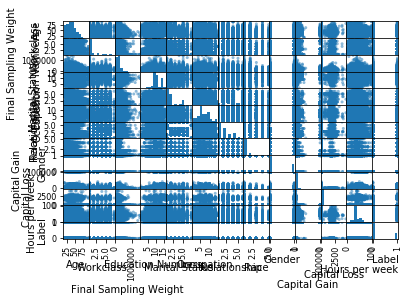

In [15]:
# scatter plot matrix
scatter_matrix(df)
plt.show()